# Capstone 2: Data Wrangling

In [1]:
# Imports
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv('tree.csv')

## Overall Quality Check

In [3]:
# Preview data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [4]:
data.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


## Check for duplicate records

In [5]:
data.duplicated().sum()

0

## Check for missing values

In [6]:
data.isnull().sum().sort_values(ascending=False)

problems            31664
spc_common          31619
spc_latin           31619
health              31616
sidewalk            31616
guards              31616
steward             31615
bin                  9559
bbl                  9559
council district     6519
census tract         6519
status                  0
curb_loc                0
stump_diam              0
trnk_other              0
tree_dbh                0
created_at              0
block_id                0
user_type               0
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
brch_shoe               0
brch_light              0
brch_other              0
y_sp                    0
x_sp                    0
longitude               0
latitude                0
state                   0
boro_ct                 0
nta_name                0
nta                     0
st_senate               0
st_assem                0
cncldist                0
borough     

### Missing Values:
* There are several missing values for the target variable, 'health' which will have to be dropped
* Other missing values will be addressed later

In [7]:
# Drop null 'health' records
data = data.dropna(subset=['health'])

## Check data types

In [8]:
data.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

### Data types:
* tree_id can be set as index
* block_id, postcode, communityboard, cncldist, st_assem, st_senate, boro_ct, latitude, longitude, x_sp, y_sp, council district, census tract, bin, bbl needs to be changed to object type
* created_at needs to be changed to date type
* tree_dbh and stump_diam only numeric type

In [9]:
# Set tree_id as index
data = data.set_index('tree_id')

In [10]:
# Change non-numeric columns to object type
for col in ['block_id', 'postcode', 'community board', 'borocode','cncldist', 'st_assem', 'st_senate', 'boro_ct', 'latitude', 'longitude', 'x_sp', 'y_sp', 'council district', 'census tract', 'bin', 'bbl']:
    data[col] = data[col].astype('object')

In [11]:
# Change date type
data['created_at'] = pd.to_datetime(data['created_at'], format='%m/%d/%Y')

## Explore Target Variable

In [12]:
# Health value counts
data.health.value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

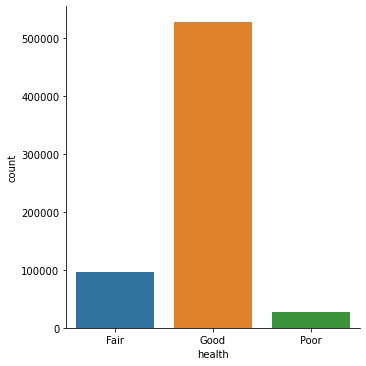

In [13]:
# Health value distribution
sns.catplot(x='health', kind='count', data=data)

### Health variable
* Very imbalanced categories
* Most trees are in 'good' health, and very few trees are in 'poor' health
* Data will have to be transformed later

## Explore Numeric Variables


In [14]:
data.select_dtypes('int64').describe()

,tree_dbh,stump_diam
count,652172.000000,652172.0
mean,11.709478,0.0
std,8.634244,0.0
min,0.000000,0.0
25%,5.000000,0.0
50%,10.000000,0.0
75%,16.000000,0.0
max,425.000000,0.0


In [15]:
# Check stump_diam values
data.stump_diam.value_counts()

0    652172
Name: stump_diam, dtype: int64

<AxesSubplot:xlabel='tree_dbh'>

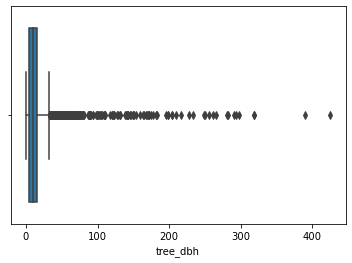

In [16]:
# Check tree_dbh
sns.boxplot(x='tree_dbh', data=data)

### Numeric Variables
* All stump_diam values are 0, so the column can be dropped
* The only numeric variable will be tree_dbh
* tree_dbh has outliers, which will need to be addressed later

In [17]:
# Drop stump_diam column
data.drop('stump_diam', inplace=True, axis=1)

## Explore Other Variables

In [18]:
data.select_dtypes('object')

,block_id,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,user_type,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
tree_id,,,,,,,,,,,,,,,,,,,,,
180683,348711,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,TreesCount Staff,...,4073900,New York,40.7231,-73.8442,1.02743e+06,202757,29,739,4.05231e+06,4.02221e+09
200540,315986,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,TreesCount Staff,...,4097300,New York,40.7941,-73.8187,1.03446e+06,228645,19,973,4.10193e+06,4.04475e+09
204026,218365,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,Volunteer,...,3044900,New York,40.7176,-73.9366,1.00182e+06,200717,34,449,3.33831e+06,3.02887e+09
204337,217969,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Volunteer,...,3044900,New York,40.7135,-73.9345,1.00242e+06,199244,34,449,3.33834e+06,3.02925e+09
189565,223043,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Volunteer,...,3016500,New York,40.6668,-73.976,990914,182202,39,165,3.02565e+06,3.01085e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155433,217978,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,Volunteer,...,3051900,New York,40.7132,-73.9549,996741,199122,34,519,3.06251e+06,3.02369e+09
183795,348185,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,Volunteer,...,4070700,New York,40.7152,-73.8567,1.02399e+06,199874,29,707,4.07545e+06,4.03181e+09
166161,401670,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,Volunteer,...,5020100,New York,40.6208,-74.1365,946351,165466,50,201,5.01166e+06,5.00408e+09


In [ ]:
data.select_dtypes('object').nunique().sort_values()

## Questions:
* I'm not sure why the code doesn't run? 
* What more can I explore for these other variables?